In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

In [ ]:
url = 'https://drive.google.com/file/d/1Xg6SS-YvoGuixFSO3ur-HU6wdB9rG7VK/view?usp=share_link'
file_id = url.split('/')[-2]
read_url='https://drive.google.com/uc?id=' + file_id

In [ ]:
df = pd.read_csv(read_url)

In [ ]:
df.head()

,Unnamed: 0,Country/Currency,currency,value,date
0,0,Australia Dollar,AUD,1.581627,17/12/2021
1,1,Great Britain Pound,GBP,0.851619,17/12/2021
2,2,Euro,EUR,1.000000,17/12/2021
3,3,Japan Yen,JPY,128.301759,17/12/2021
4,4,Switzerland Franc,CHF,1.041015,17/12/2021


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74834 entries, 0 to 74833
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        74834 non-null  int64  
 1   Country/Currency  74834 non-null  object 
 2   currency          74834 non-null  object 
 3   value             74834 non-null  float64
 4   date              74834 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.9+ MB


In [ ]:
df=df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

In [ ]:
df["value"].describe()

count    74834.000000
mean      1607.218338
std       5390.077759
min          0.130975
25%          3.932595
50%         33.187794
75%        397.214947
max      51690.453353
Name: value, dtype: float64

In [ ]:
df['currency'].unique()

array(['AUD', 'GBP', 'EUR', 'JPY', 'CHF', 'USD', 'AFN', 'ALL', 'DZD',
       'AOA', 'ARS', 'AMD', 'AWG', 'AZN', 'BSD', 'BHD', 'BDT', 'BBD',
       'BYR', 'BZD', 'BMD', 'BTN', 'BOB', 'BAM', 'BWP', 'BRL', 'BND',
       'BGN', 'BIF', 'XOF', 'XAF', 'XPF', 'KHR', 'CAD', 'CVE', 'KYD',
       'CLP', 'CNY', 'COP', 'KMF', 'CDF', 'CRC', 'HRK', 'CUC', 'CUP',
       'CZK', 'DKK', 'DJF', 'DOP', 'XCD', 'EGP', 'SVC', 'ETB', 'FKP',
       'FJD', 'GMD', 'GEL', 'GHS', 'GIP', 'GTQ', 'GNF', 'GYD', 'HTG',
       'HNL', 'HKD', 'HUF', 'ISK', 'INR', 'IDR', 'IRR', 'IQD', 'ILS',
       'JMD', 'JOD', 'KZT', 'KES', 'KWD', 'KGS', 'LAK', 'LBP', 'LSL',
       'LRD', 'LYD', 'MOP', 'MKD', 'MGA', 'MWK', 'MYR', 'MVR', 'MRO',
       'MUR', 'MXN', 'MDL', 'MNT', 'MAD', 'MZN', 'MMK', 'ANG', 'NAD',
       'NPR', 'NZD', 'NIO', 'NGN', 'KPW', 'NOK', 'OMR', 'PKR', 'PAB',
       'PGK', 'PYG', 'PEN', 'PHP', 'PLN', 'QAR', 'RON', 'RUB', 'RWF',
       'WST', 'STD', 'SAR', 'RSD', 'SCR', 'SLL', 'SGD', 'SBD', 'SOS',
       'ZAR', 'KRW',

In [ ]:
df['Country/Currency'].unique()

array(['Australia Dollar', 'Great Britain Pound', 'Euro', 'Japan Yen',
       'Switzerland Franc', 'USA Dollar', 'Afghanistan Afghani',
       'Albania Lek', 'Algeria Dinar', 'Angola Kwanza', 'Argentina Peso',
       'Armenia Dram', 'Aruba Florin', 'Azerbaijan New Manat',
       'Bahamas Dollar', 'Bahrain Dinar', 'Bangladesh Taka',
       'Barbados Dollar', 'Belarus Ruble', 'Belize Dollar',
       'Bermuda Dollar', 'Bhutan Ngultrum', 'Bolivia Boliviano',
       'Bosnia Mark', 'Botswana Pula', 'Brazil Real', 'Brunei Dollar',
       'Bulgaria Lev', 'Burundi Franc', 'CFA Franc BCEAO',
       'CFA Franc BEAC', 'CFP Franc', 'Cambodia Riel', 'Canada Dollar',
       'Cape Verde Escudo', 'Cayman Islands Dollar', 'Chili Peso',
       'China Yuan/Renminbi', 'Colombia Peso', 'Comoros Franc',
       'Congo Franc', 'Costa Rica Colon', 'Croatia Kuna',
       'Cuba Convertible Peso', 'Cuba Peso', 'Czech Koruna',
       'Denmark Krone', 'Djibouti Franc', 'Dominican Republich Peso',
       'East Caribb

In [ ]:
unique_country = list(df['Country/Currency'].unique())
unique_currency = list(df['currency'].unique())
for x in range(len(unique_country)):
    print('Country name: {0} -> Currency: {1}'.format(unique_country[x], unique_currency[x]))

Country name: Australia Dollar -> Currency: AUD
Country name: Great Britain Pound -> Currency: GBP
Country name: Euro -> Currency: EUR
Country name: Japan Yen -> Currency: JPY
Country name: Switzerland Franc -> Currency: CHF
Country name: USA Dollar -> Currency: USD
Country name: Afghanistan Afghani -> Currency: AFN
Country name: Albania Lek -> Currency: ALL
Country name: Algeria Dinar -> Currency: DZD
Country name: Angola Kwanza -> Currency: AOA
Country name: Argentina Peso -> Currency: ARS
Country name: Armenia Dram -> Currency: AMD
Country name: Aruba Florin -> Currency: AWG
Country name: Azerbaijan New Manat -> Currency: AZN
Country name: Bahamas Dollar -> Currency: BSD
Country name: Bahrain Dinar -> Currency: BHD
Country name: Bangladesh Taka -> Currency: BDT
Country name: Barbados Dollar -> Currency: BBD
Country name: Belarus Ruble -> Currency: BYR
Country name: Belize Dollar -> Currency: BZD
Country name: Bermuda Dollar -> Currency: BMD
Country name: Bhutan Ngultrum -> Currency:

PICKING UP INDIA AND USA FOR TIME SERIES ANNALYSIS

In [ ]:
data_usd = df.loc[df.currency == 'USD']
data_inr = df.loc[df.currency == 'INR']

In [ ]:
data_inr.head()

,Country/Currency,currency,value,date
67,India Rupee,INR,86.052225,2021-12-17
217,India Rupee,INR,85.424708,2021-12-18
367,India Rupee,INR,85.424708,2021-12-19
517,India Rupee,INR,85.497443,2021-12-20
667,India Rupee,INR,85.525694,2021-12-21


In [ ]:

data_inr.drop([ 'Country/Currency', 'currency'], axis = 1, inplace = True)
data_inr.head()

<ipython-input-14-5f4a1d675371>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_inr.drop([ 'Country/Currency', 'currency'], axis = 1, inplace = True)


,value,date
67,86.052225,2021-12-17
217,85.424708,2021-12-18
367,85.424708,2021-12-19
517,85.497443,2021-12-20
667,85.525694,2021-12-21


<Axes: xlabel='date', ylabel='value'>

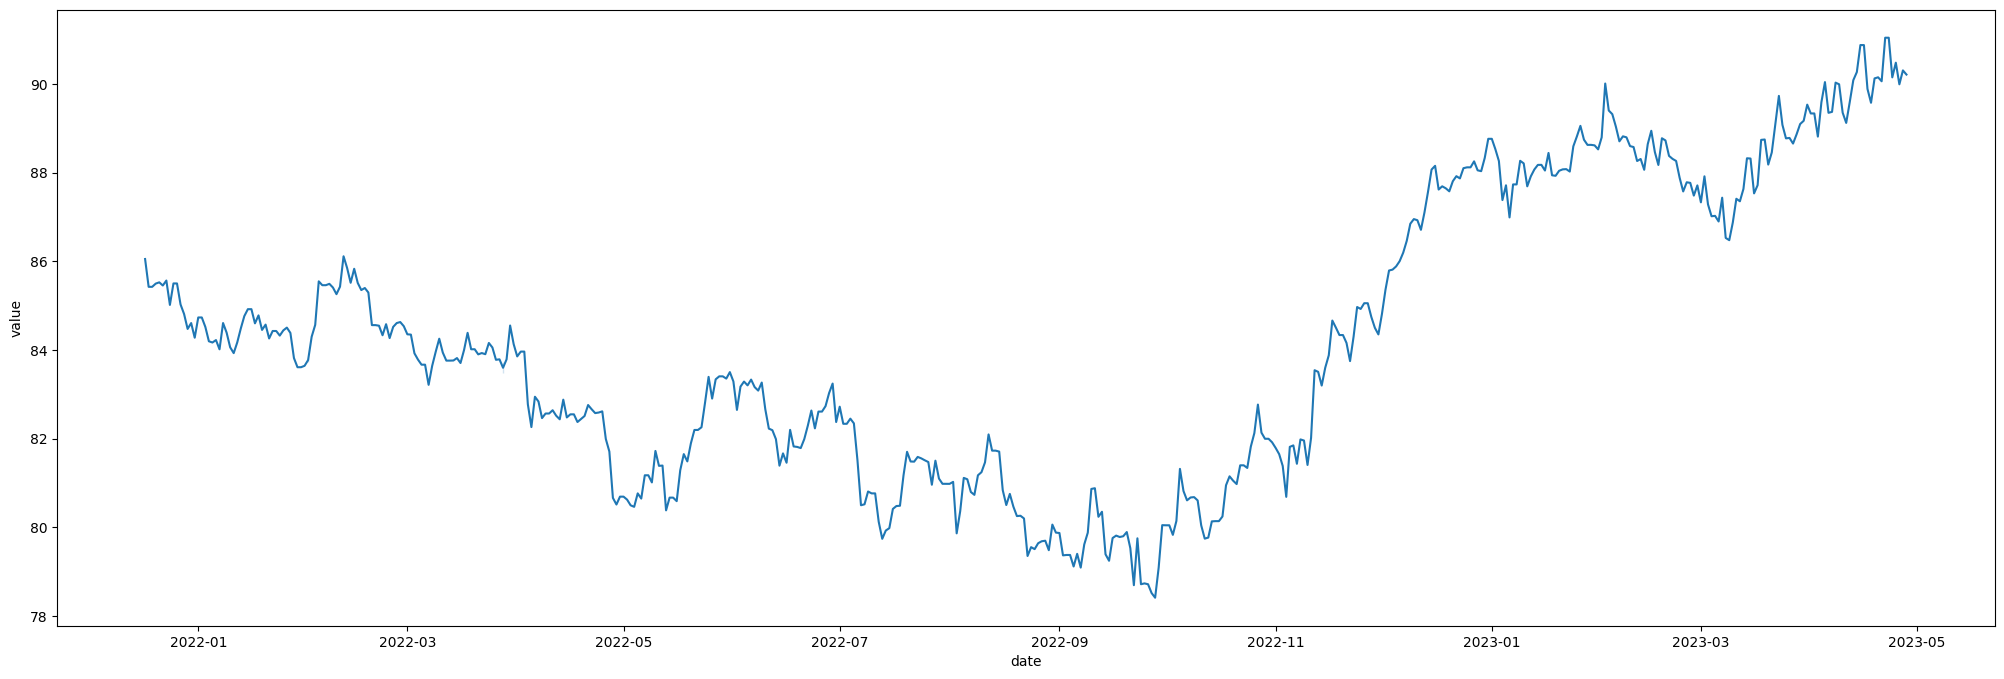

In [ ]:
plt.figure(figsize=(25,8))
sns.lineplot(x="date",y="value",data=data_inr)

In [ ]:
data_inr.head()

,value,date
67,86.052225,2021-12-17
217,85.424708,2021-12-18
367,85.424708,2021-12-19
517,85.497443,2021-12-20
667,85.525694,2021-12-21


In [ ]:
data_inr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 67 to 74751
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   value   499 non-null    float64       
 1   date    499 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.7 KB


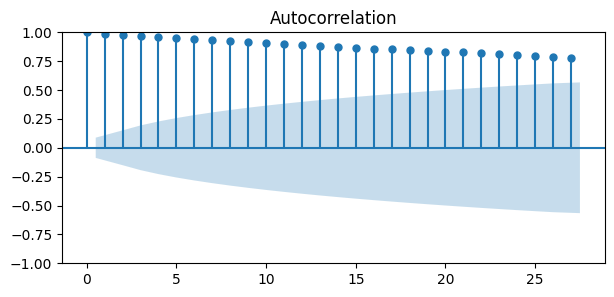

In [ ]:
plt.rc("figure", figsize=(7,3))
plot_acf(data_inr['value'])
print()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


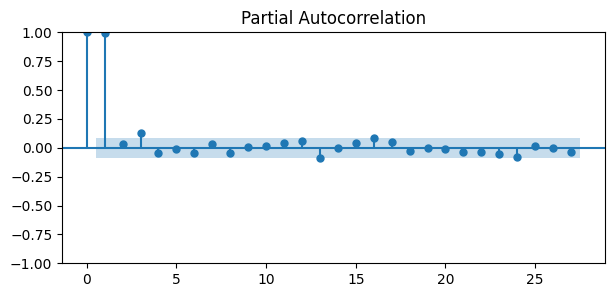

In [ ]:
plt.rc("figure", figsize=(7,3))
plot_pacf(data_inr['value'])
print()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test(data_inr['value'])

ADF Statistics: -0.37290057931888854
p- value: 0.914526035708639
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
daily_return = data_inr["value"].pct_change(1).dropna()

In [ ]:
daily_return

217     -0.007292
367      0.000000
517      0.000851
667      0.000330
817     -0.000832
           ...   
74151   -0.009818
74301    0.003670
74451   -0.005398
74601    0.003491
74751   -0.001039
Name: value, Length: 498, dtype: float64

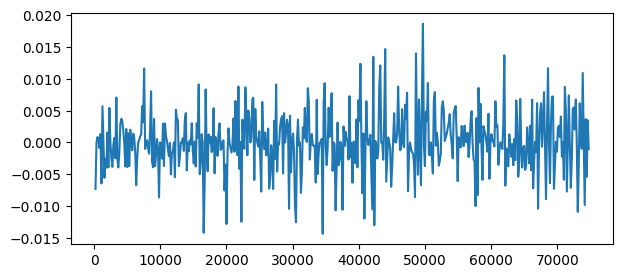

In [ ]:
plt.plot(daily_return)

In [ ]:
adf_test(daily_return)

ADF Statistics: -18.362462849829438
p- value: 2.2259146949999135e-30
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


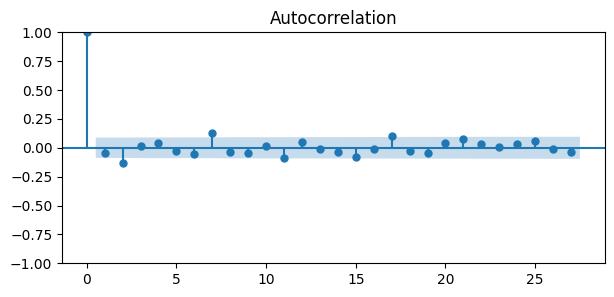

In [ ]:
plt.rc("figure", figsize=(7,3))
plot_acf(daily_return)
print()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


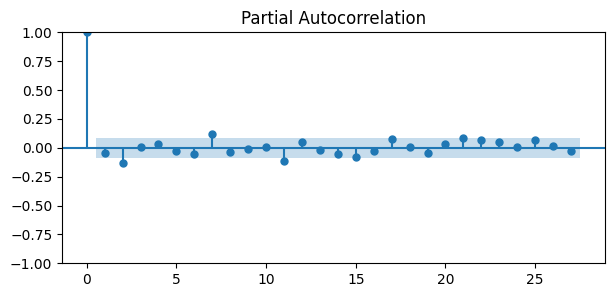

In [ ]:
plt.rc("figure", figsize=(7,3))
plot_pacf(daily_return)
print()

# Conclusion : As we can see that even after making the data "Stationary" the acf and pacf plot is coming same which indicates that there are some underlying residual pattern which can not be captured by using autoregressive models , so we may directly use residual heteroscedastic models for better result.  

# AARCH & GARCH MODEL

In [ ]:
pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 19.0 MB/s eta 0:00:00


In [ ]:
import arch

In [ ]:
models = []
for p in range(1, 5):
    for q in range(1, 5):
        models.append(('GARCH({},{})'.format(p, q), arch.arch_model(daily_return, vol='GARCH', p=p, q=q)))


In [ ]:
results = []
for name, model in models:
    result = model.fit()
    results.append((name, result.aic, result.bic))


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.143e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.143e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWa

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2682577491.858091
Iteration:      2,   Func. Count:     18,   Neg. LLF: -1974.4696567985893
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1974.4696522550928
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      7,   Neg. LLF: 2929505031.857363
Iteration:      2,   Func. Count:     21,   Neg. LLF: 4.2987554971061766e+27
Iteration:      3,   Func. Count:     37,   Neg. LLF: 3160859253625.5864
Iteration:      4,   Func. Count:     52,   Neg. LLF: 4.014835535300515e+23
Iteration:      5,   Func. Count:     67,   Neg. LLF: 1022.6564419730283
Inequality constraints incompatible    (Exit mode 4)
            Current function value: 1022.6566804053467
            Iterations: 6
            Function evaluations: 67
            Gradient evaluations: 5
Iteration:      1,   Func. Count:      8,   Neg. LLF: 2.17442264620

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.143e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.143e-05. Parameter
estimation work better when this value is between 1 and 1000. The recomme

Iteration:      1,   Func. Count:      9,   Neg. LLF: 2408029280.6005683
Iteration:      2,   Func. Count:     24,   Neg. LLF: -1975.024172266439
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1975.0241645779029
            Iterations: 6
            Function evaluations: 24
            Gradient evaluations: 2
Iteration:      1,   Func. Count:     10,   Neg. LLF: 1.9116519693436187e+19
Iteration:      2,   Func. Count:     27,   Neg. LLF: 1.3948698910036257e+22
Iteration:      3,   Func. Count:     46,   Neg. LLF: 1.3022314085899485e+25
Iteration:      4,   Func. Count:     64,   Neg. LLF: 772487.4589880109
Inequality constraints incompatible    (Exit mode 4)
            Current function value: 772487.4705419451
            Iterations: 4
            Function evaluations: 64
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      8,   Neg. LLF: 1.9160282400706867e+19
Iteration:      2,   Func. Count:     23,   Neg. LLF: 15260

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.143e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.143e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarn

In [ ]:
# Display the results
df = pd.DataFrame(results, columns=['Model', 'AIC', 'BIC'])
print(df)

# Identify the model with the lowest AIC or BIC
best_model = df.loc[df['AIC'].idxmin()]
print('Best model:', best_model['Model'])


         Model           AIC           BIC
0   GARCH(1,1) -3.940939e+03 -3.924097e+03
1   GARCH(1,2)  2.055313e+03  2.076366e+03
2   GARCH(1,3)  4.982169e+03  5.007432e+03
3   GARCH(1,4) -3.937620e+03 -3.908146e+03
4   GARCH(2,1)  1.966391e+04  1.968496e+04
5   GARCH(2,2) -1.087827e+03 -1.062563e+03
6   GARCH(2,3) -3.936048e+03 -3.906574e+03
7   GARCH(2,4)  1.544991e+06  1.545025e+06
8   GARCH(3,1) -3.936213e+03 -3.910949e+03
9   GARCH(3,2) -3.935107e+03 -3.905632e+03
10  GARCH(3,3)  8.657665e+03  8.691349e+03
11  GARCH(3,4) -3.717689e+03 -3.679794e+03
12  GARCH(4,1) -3.934764e+03 -3.905290e+03
13  GARCH(4,2) -3.933868e+03 -3.900183e+03
14  GARCH(4,3) -3.931451e+03 -3.893556e+03
15  GARCH(4,4) -1.329734e+03 -1.287628e+03
Best model: GARCH(1,1)


In [ ]:
Best_Model = arch.arch_model(daily_return, vol='GARCH', p=1, q=1)
best_result=Best_Model.fit()
forecast = best_result.forecast(horizon=10)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2682577491.858091
Iteration:      2,   Func. Count:     18,   Neg. LLF: -1974.4696567985893
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1974.4696522550928
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.143e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [ ]:
best_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  value   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1974.47
Distribution:                  Normal   AIC:                          -3940.94
Method:            Maximum Likelihood   BIC:                          -3924.10
                                        No. Observations:                  498
Date:                Sat, Jun 03 2023   Df Residuals:                      497
Time:                        14:26:56   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         5.8825e-05  1.246e-06     47.195      0.000 [5.638e-05,6.127e-05]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      4.2855e-07  1.057e-10   4052.967      0.000  [4.283e-07,4.288e-07]
alpha[1]       0.0100  1.371e-02      0.730      0.466 [-1.687e-02,3.687e-02]
beta[1]        0.9700  1.531e-02     63.370      0.000      [  0.940,  1.000]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
best_result.aic, best_result.bic

(-3940.9393045101856, -3924.096904202087)

TypeError: ignored

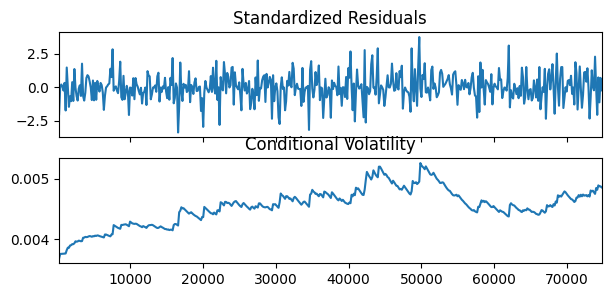

In [ ]:
best_result.plot()
forecast_values = forecast
plt.plot(forecast_values, label='Forecast')
plt.show()

## Conclusion : As there is spike in the condition volatility which indicates that the model has failed to capture the volatility patterns well but the Residual plot is showing that the data is stationary which can be interpreted as the goodness of the model.

## TRYING EGARCH

considering EGARCH model as it has the capability to capture patteren from the unstationary data

In [ ]:
model_egarch = arch.arch_model(data_inr["value"], vol='EGARCH', p=1, o=1, q=1, dist='Normal')
results = model_egarch.fit()
results.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 1344466875.876248
Iteration:      2,   Func. Count:     16,   Neg. LLF: 94848708513.65862
Iteration:      3,   Func. Count:     26,   Neg. LLF: 117333804430.90016
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1241844270.7043052
Iteration:      5,   Func. Count:     43,   Neg. LLF: 1768.486327451743
Iteration:      6,   Func. Count:     51,   Neg. LLF: 1071.0899698595617
Iteration:      7,   Func. Count:     57,   Neg. LLF: 1070.834470276351
Iteration:      8,   Func. Count:     63,   Neg. LLF: 1070.6752615338855
Iteration:      9,   Func. Count:     69,   Neg. LLF: 1070.3337749766388
Iteration:     10,   Func. Count:     75,   Neg. LLF: 1070.2683522035704
Iteration:     11,   Func. Count:     81,   Neg. LLF: 1070.2619584285567
Iteration:     12,   Func. Count:     87,   Neg. LLF: 1070.2618293260593
Iteration:     13,   Func. Count:     93,   Neg. LLF: 1070.2618230914368
Iteration:     14,   Func. Count:     98,   Neg. LLF: 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                  value   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -1070.26
Distribution:                  Normal   AIC:                           2150.52
Method:            Maximum Likelihood   BIC:                           2171.59
                                        No. Observations:                  499
Date:                Sat, Jun 03 2023   Df Residuals:                      498
Time:                        14:27:07   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            84.2409  7.891e-02   1067.564      0.000 [ 84.086, 84.396]
                               Volatility Model                               
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
omega          -0.0579  5.564e-02     -1.040      0.298    [ -0.167,5.118e-02]
alpha[1]        1.3695      0.249      5.490  4.018e-08      [  0.881,  1.858]
gamma[1]   -5.7720e-03  2.030e-02     -0.284      0.776 [-4.556e-02,3.401e-02]
beta[1]         0.9007  3.399e-02     26.497 1.061e-154      [  0.834,  0.967]
==============================================================================

Covariance estimator: robust
"""

In [ ]:
results.aic, results.bic

(2150.5236461828736, 2171.5866766616314)

In [ ]:
std_resid = results.resid / results.conditional_volatility

## AARCH-LM TEST & LJUNG-BOX TEST

In [ ]:
import arch
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.diagnostic import het_arch
arch_lm_test = het_arch(results.resid)
print("ARCH-LM Test p-value: ", arch_lm_test[1])

# Perform the Ljung-Box test
lb_test = acorr_ljungbox(std_resid, lags=[10], return_df=False)
print("Ljung-Box Test p-values: ", lb_test[1])

ARCH-LM Test p-value:  3.3213436182920143e-91
Ljung-Box Test p-values:  [0.]


## A very small p-value from the ARCH-LM test and Ljung-Box test suggests that the model residuals are not random and contain some systematic patterns that are not captured by the model. This may indicate that the model is misspecified and could be improved by adding additional variables or changing the model specification.

## It's also worth noting that a p-value of 0 from the Ljung-Box test indicates strong evidence against the null hypothesis of no autocorrelation in the residuals. This further supports the conclusion that the model may be misspecified.

In [ ]:
data = data_inr['value'].values
print('Shape of data: ', data.shape)

Shape of data:  (499,)


In [ ]:
train_length = int(len(data) * 0.8)
print('Train length: ', train_length)

train_data, test_data = data[:train_length], data[train_length:]
print('Shape of Train and Test data: ', len(train_data), len(test_data))

Train length:  399
Shape of Train and Test data:  399 100


In [ ]:
from numpy import array
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [ ]:
lag = 3  # Empirically we have choosen
n_features = 1

In [ ]:
train_length = int(len(data) * 0.8)
print('Train length: ', train_length)

train_data, test_data = data[:train_length], data[train_length:]
print('Shape of Train and Test data: ', len(train_data), len(test_data))

Train length:  399
Shape of Train and Test data:  399 100


In [ ]:
train_X, train_y = split_sequence(train_data, lag)
test_X, test_y = split_sequence(test_data, lag)

In [ ]:
print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (396, 3) (396,)
Shape of test_X and test_y:  (97, 3) (97,)


In [ ]:
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))
# New shape of train_X and test_X are :-
print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (396, 3, 1) (396,)
Shape of test_X and test_y:  (97, 3, 1) (97,)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=False, input_shape=(lag, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [ ]:
history = model.fit(train_X, train_y, epochs =70, batch_size=8, verbose=1, validation_split= 0.1)

Epoch 1/70


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


45/45 [==============================] - 2s 31ms/step - loss: 1096.9351 - val_loss: 27.6803
Epoch 2/70
45/45 [==============================] - 1s 29ms/step - loss: 5.0400 - val_loss: 0.3943
Epoch 3/70
45/45 [==============================] - 2s 38ms/step - loss: 0.2700 - val_loss: 0.1717
Epoch 4/70
45/45 [==============================] - 1s 30ms/step - loss: 0.2296 - val_loss: 0.1748
Epoch 5/70
45/45 [==============================] - 1s 30ms/step - loss: 0.2277 - val_loss: 0.1715
Epoch 6/70
45/45 [==============================] - 1s 29ms/step - loss: 0.2316 - val_loss: 0.1931
Epoch 7/70
45/45 [==============================] - 1s 29ms/step - loss: 0.2313 - val_loss: 0.1707
Epoch 8/70
45/45 [==============================] - 1s 28ms/step - loss: 0.2277 - val_loss: 0.1878
Epoch 9/70
45/45 [==============================] - 1s 30ms/step - loss: 0.2353 - val_loss: 0.1756
Epoch 10/70
45/45 [==============================] - 1s 29ms/step - loss: 0.2452 - val_loss: 0.2006
Epoch 11/70
45/4

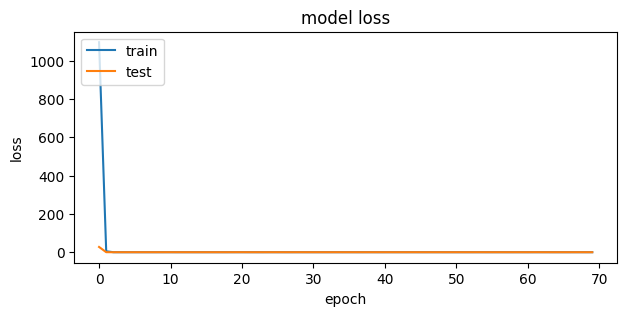

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

print('Shape of train and test predict: ', train_predict.shape, test_predict.shape)

4/4 [==============================] - 0s 10ms/step
Shape of train and test predict:  (396, 1) (97, 1)


In [ ]:
import math
from sklearn.metrics import mean_squared_error

def measure_rmse(actual, predicted):
    return math.sqrt(mean_squared_error(actual, predicted))

train_score = measure_rmse(train_y, train_predict)
test_score = measure_rmse(test_y, test_predict)

print('Train and Test RMSE: ', train_score, test_score)

Train and Test RMSE:  0.46387043545244194 0.47904602721670975


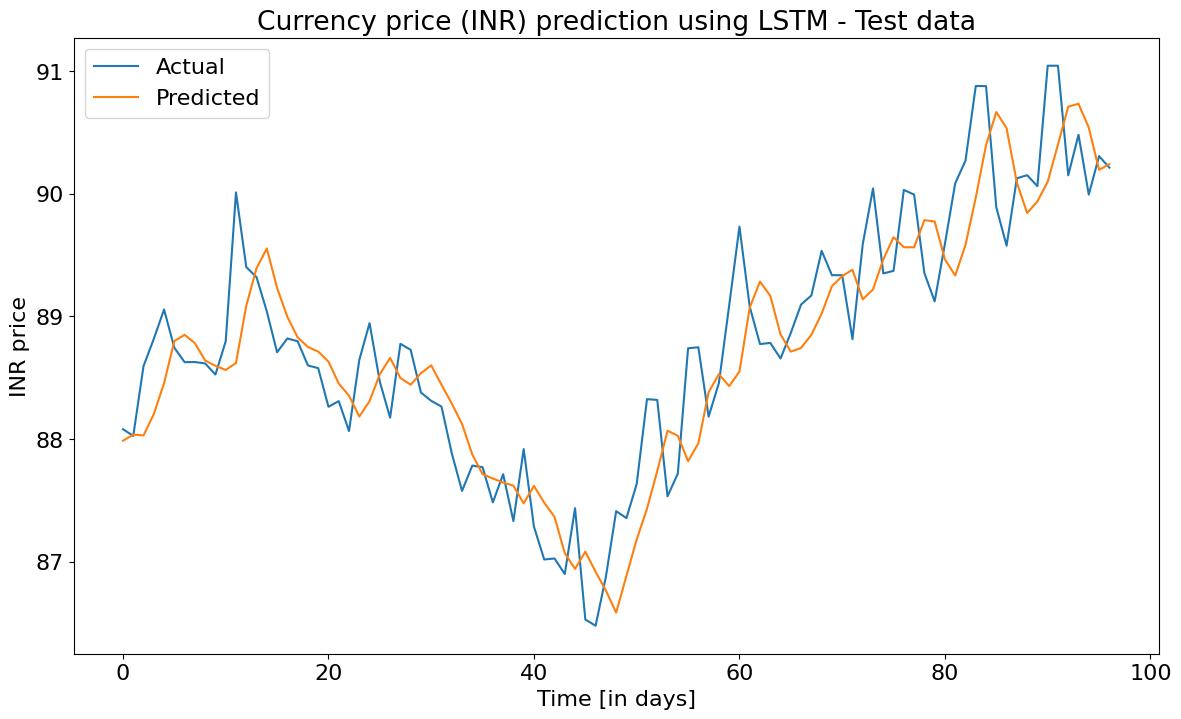

In [ ]:
plt.rc("figure", figsize=(14,8))
plt.rcParams.update({'font.size': 16})
plt.plot(test_y, label = 'Actual')
plt.plot(test_predict, label = 'Predicted')
plt.xlabel('Time [in days]')
plt.ylabel('INR price')
plt.title('Currency price (INR) prediction using LSTM - Test data')
plt.legend()
plt.show()